As you can see in the scraping we did during Data Collection/Cleaning, we only polled specific areas on the chart (see bottom of [this page](https://www.rolimons.com/game/4924922222)) and so we'll only receive player count information for certain days. Since we're missing information between those days, we'll just linearly interpolate to fill in the gaps.

We also notice that some games have different days filled in compared to the majority of the games. This is because we attempted to track all games over a 3 month period, but games that have less than 3 months of data tracked would not have the same time frame. As such, some of those games will be cut short and not contribute to data in earlier days.

Here we can plot the sums and means of the different Roblox genres to get a general idea of what our plots will look like in the end, after we apply our own Genres. The means are slightly more useful than the sums because the trends become less dependent on how many games of that genre there are.

<AxesSubplot:title={'center':'Playercount Means'}>

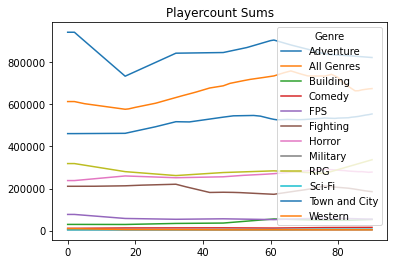

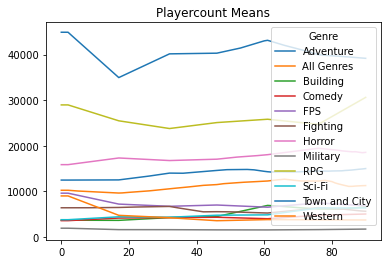

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("games_playercount.csv")

# Isolate playercount data
df_playercounts = df.loc[:, '0':'90'].astype(float)

# Fill in missing data with linear interpolation
df_playercounts.interpolate(axis=1,inplace=True,limit_direction='both')

df_playercounts['Genre'] = df['Genre']

df_playercounts.groupby(['Genre']).sum().T.plot.line(title='Playercount Sums')
df_playercounts.groupby(['Genre']).mean().T.plot.line(title='Playercount Means')

So, as we can see from the Roblox genres (which as a reminder, are set by the developers of the games and are not enforced by Roblox) show us some pretty interesting results. The most played games seem to be 'Town and City' type games. 

The 'All Genres' category comes in second in terms of total playercount, but we notice that the average of 'All Genres' players is fairly low. This is most likely because there are a lot of games in our sample that are listed as 'All Genres', and so the sum of players is greater.

On average, RPGs have a lot of players playing them, but the total playercount for them is lower, suggesting that there aren't many RPG labeled games on the platform. This is fairly interesting, considering that it's fairly popular amongst the players that do play them.

Horror follows as a distant third in terms of mean popularity, which makes sense as horror games became a staple on Roblox in the past year or so. It'd be really interesting to be able to see when this increase in horror games actually happened, but it'd require us to scrape for a much longer time (and possibly scrape information that rolimons doesn't have).

As for the rest of the genres, they're generally in the same place in terms of average playercount. A few are slightly more popular than the others, but not at the same scale that the dominating genres are.

<AxesSubplot:title={'center':'Playercount Means'}>

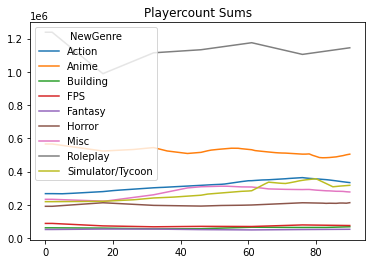

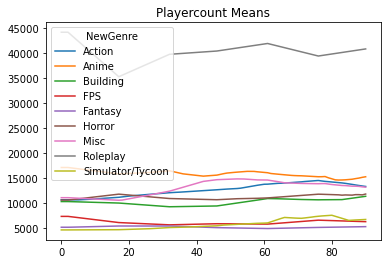

In [2]:
import matplotlib.pyplot as plt

df = pd.read_csv("games_playercount_train.csv")
df_trained = pd.read_csv("games_playercount_newgenres.csv")

df = pd.concat([df, df_trained]) # Concatenating the ML predicted NewGenre games with the original training dataset

# Isolate playercount data
df_playercounts = df.loc[:, '0':'90'].astype(float)

# Fill in missing data with linear interpolation
df_playercounts.interpolate(axis=1,inplace=True,limit_direction='both')

df_playercounts['NewGenre'] = df['NewGenre']

df_playercounts.groupby(['NewGenre']).sum().T.plot.line(title='Playercount Sums')
df_playercounts.groupby(['NewGenre']).mean().T.plot.line(title='Playercount Means')

Here we can see the games after we classified them into our own genres. We first manually assigned a genre to 100 games, and then used ML to predict the other half.

With our new genres, we see that Roleplaying games are extremely popular on Roblox. This lines up with our previous graphs using Roblox's genres, because three of the largest Roleplaying games ('Welcome to Bloxburg', 'Adopt Me!', and 'Brookhaven') are all listed as 'Town and City' on Roblox. In fact, we notice that our playercount means and sums lines for Roleplaying are remarkably similar. This is probably because those games have such a high playercount that they're heavily skewing the genre (all three of those games usually have playercounts in the hundreds of thousands).

Anime games are an extremely popular genre on Roblox at the moment. Anime does seem to be trending down slightly, but not drastically enough to really conclude anything. It's fairly concerning as a lot of these games borderline infringe on intellectual properties that they do not have access to, so it'll be interesting to monitor how these games do going into the future. 

One genre that stands out is the 'Action' genre. Their playercount has been trending up recently (though falling a bit in the last 2 weeks or so). This suggests that their might be an increasing trend in the popularity of Action games, and it might be worth looking into developing one to cash in on the trend.

Another metric that'd be interesting to look into is the Upvote ratio of each game/genre. We can simply find the ratio by dividing the upvotes by the total number of votes.

count    200.000000
mean      84.749500
std        8.169758
min       43.972791
25%       81.632656
50%       86.203084
75%       89.758521
max       95.862212
Name: VoteRatio, dtype: float64

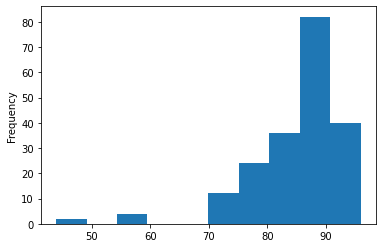

In [3]:
for index, row in df.iterrows():
  upVotes = row['TotalUpVotes']
  downVotes = row['TotalDownVotes']
  
  if (upVotes + downVotes) != 0:
    voteRatio = 100 * upVotes/(upVotes + downVotes)
    df.loc[index,'VoteRatio'] = voteRatio

df["VoteRatio"].plot.hist()
df["VoteRatio"].describe()

Here, we can see that generally games are within the 85-90% likes range. We have a few outliers with a very low like-dislike ratio, which are probably the more controversial games.

NewGenre
Action              AxesSubplot(0.125,0.125;0.775x0.755)
Anime               AxesSubplot(0.125,0.125;0.775x0.755)
Building            AxesSubplot(0.125,0.125;0.775x0.755)
FPS                 AxesSubplot(0.125,0.125;0.775x0.755)
Fantasy             AxesSubplot(0.125,0.125;0.775x0.755)
Horror              AxesSubplot(0.125,0.125;0.775x0.755)
Misc                AxesSubplot(0.125,0.125;0.775x0.755)
Roleplay            AxesSubplot(0.125,0.125;0.775x0.755)
Simulator/Tycoon    AxesSubplot(0.125,0.125;0.775x0.755)
Name: VoteRatio, dtype: object

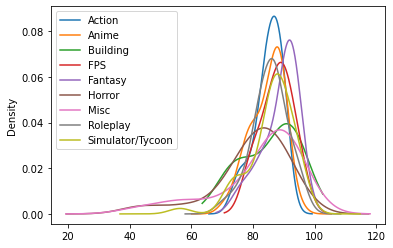

In [4]:
df.groupby(['NewGenre'])["VoteRatio"].plot.density(legend=True)

Observing the like ratio for different genres, it seems as though Fantasy games are the most well received amongst the players that play them. Slightly behind that is FPS games, which is interesting considering competitive games are usually more controversial than other games (due to the nature of competition being frustrating and leading players to dislike them).

We notice that games in the Misc genre are fairly spread out, and this is likely because the Misc genre is very diverse by nature. It makes sense for the like ratios of the Misc genre to be sporadic. 

Another notable observation is that Horror games are mostly on the lower end of like ratios, probably because players who dislike being scared would dislike them after trying them out.

<AxesSubplot:title={'center':'Total Plays vs Vote Ratio (All Genres)'}, xlabel='Plays', ylabel='VoteRatio'>

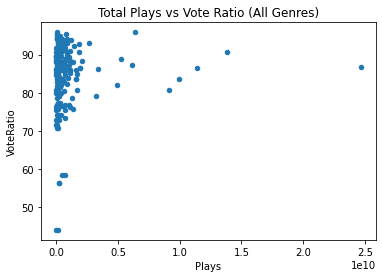

In [5]:
df.plot.scatter(x='Plays',y='VoteRatio',title='Total Plays vs Vote Ratio (All Genres)')

Most games are clustered in the 85-95% for their vote ratios. As games become more popular, they're less likely to be as well liked. This is expected as the more popular a game gets, the less likely it is that the game will please everyone.

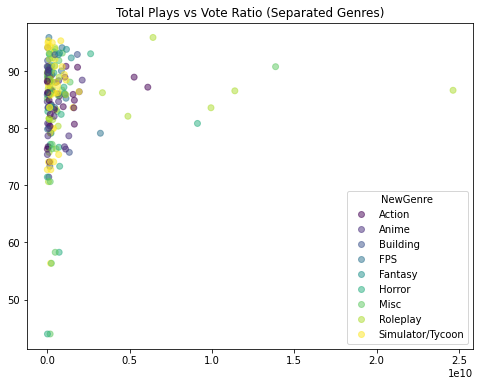

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

df2 = df.copy(deep=True)
u, df2['NewGenre_'] = np.unique(df2['NewGenre'], return_inverse=True)

sc = ax.scatter(x='Plays',y='VoteRatio',c='NewGenre_',data=df2,alpha=0.5)
ax.set_title('Total Plays vs Vote Ratio (Separated Genres)')
ax.legend(sc.legend_elements()[0], u, title='NewGenre')

plt.show()